In [15]:
general_directory = os.path.join(os.getcwd(), "C:\\Users\\User\\Desktop\\NCKUFIN\\DPL\\期末\\ecg-id-database-1.0.0\\ecg-id-database-1.0.0")
entries = os.listdir(general_directory)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.signal
import glob
import os
import seaborn as sns
%matplotlib inline

#import ECG_Biometric_functions as functions

In [33]:
df_ecg = pd.read_pickle("df_ecg")
df_ecg_gender = pd.get_dummies(df_ecg.Gender)
cat_df = df_ecg.select_dtypes(include=["object"])
cat_df.shape[1]
cat_df.isnull().sum().sort_values()
df_ecg = df_ecg.join(df_ecg_gender, how='outer').drop(["Gender"], axis=1)
df_ecg = df_ecg.dropna()

In [34]:
# Upload the saved ECG samples, drop the rows with all NaN values and fill with zero the remaining NaNs 
df_ecg_samples = pd.read_pickle("df_ecg_samples")
df_ecg_samples = df_ecg_samples.dropna(how="all")
df_ecg_samples = df_ecg_samples.fillna(0)

In [35]:
# Join both DataFrames
df_ecg = df_ecg.join(df_ecg_samples, how='outer')
df_ecg

,Subject_ID,Age,RR,ECG_mean,ECG_std,ECG_var,ECG_median,female,male,ecg_0,...,ecg_6851,ecg_6852,ecg_6853,ecg_6854,ecg_6855,ecg_6856,ecg_6857,ecg_6858,ecg_6859,ecg_6860
0,1,25,1.564,-0.005709,0.143250,0.020521,-0.044025,0,1,0.786164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,25,1.864,0.009104,0.148422,0.022029,-0.037736,0,1,0.924530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25,1.852,-0.001956,0.150660,0.022698,-0.044025,0,1,0.823900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,25,1.756,-0.005924,0.156182,0.024393,-0.050315,0,1,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,25,2.496,0.021659,0.150437,0.022631,-0.031447,0,1,0.622640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,89,40,1.848,0.007995,0.136229,0.018558,-0.039757,1,0,0.568196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2853,89,40,2.784,0.007042,0.135180,0.018274,-0.034091,1,0,0.568197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,89,40,2.790,0.003459,0.128510,0.016515,-0.039772,1,0,0.539772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2855,89,40,1.712,0.003983,0.133123,0.017722,-0.039772,1,0,0.602272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X = df_ecg.drop('Subject_ID', axis=1)
y = df_ecg['Subject_ID']
y.shape

(2832,)

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 建立DenseNet模型
def create_densenet_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model
X = df_ecg.drop('Subject_ID', axis=1)
y = df_ecg['Subject_ID']
# 数据预处理和拆分为训练集和验证集
  # 替换为实际的数据矩阵
  # 替换为实际的标签矩阵

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义模型参数
input_shape = X_train.shape[1:]
num_classes = 90  # 替换为实际的类别数

# 创建DenseNet模型
model = create_densenet_model(input_shape, num_classes)

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# 计算训练集和验证集的准确率
_, train_accuracy = model.evaluate(X_train, y_train)
_, val_accuracy = model.evaluate(X_val, y_val)

# 预测验证集数据
y_pred = np.argmax(model.predict(X_val), axis=-1)

# 计算分类报告
classification_rep = classification_report(y_val, y_pred)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Classification Report:")
print(classification_rep)


Epoch 1/10
71/71 [==============================] - 8s 53ms/step - loss: 4.0023 - accuracy: 0.1029 - val_loss: 3.6264 - val_accuracy: 0.1464
Epoch 2/10
71/71 [==============================] - 3s 39ms/step - loss: 2.7535 - accuracy: 0.3099 - val_loss: 2.3222 - val_accuracy: 0.4691
Epoch 3/10
71/71 [==============================] - 3s 44ms/step - loss: 1.4941 - accuracy: 0.5788 - val_loss: 1.4954 - val_accuracy: 0.6261
Epoch 4/10
71/71 [==============================] - 3s 39ms/step - loss: 0.9059 - accuracy: 0.7263 - val_loss: 1.1670 - val_accuracy: 0.6896
Epoch 5/10
71/71 [==============================] - 3s 38ms/step - loss: 0.6370 - accuracy: 0.8053 - val_loss: 1.0228 - val_accuracy: 0.7460
Epoch 6/10
71/71 [==============================] - 2s 23ms/step - loss: 0.5094 - accuracy: 0.8455 - val_loss: 1.0428 - val_accuracy: 0.7319
Epoch 7/10
71/71 [==============================] - 1s 10ms/step - loss: 0.3605 - accuracy: 0.8918 - val_loss: 0.9249 - val_accuracy: 0.7531
Epoch 8/10
71

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


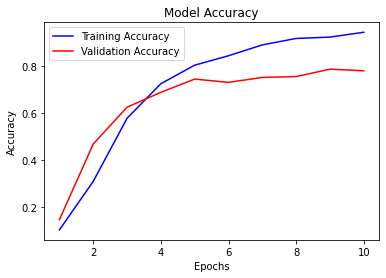

In [49]:
import matplotlib.pyplot as plt


# 提取训练和验证的准确率
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 绘制准确率曲线
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
